# Actividad: Regresión Lineal


---

**Joel Isaias Solano Ocampo | A011639289**

Utiliza un modelo de regresión lineal múltiple para predecir el salario en dolares (salary_in_usd) de cada empleado. Las variables regresoras de tu modelo deben de ser las siguientes: nivel de experiencia (experience_level), tipo de empleo (employment_type), salario (salary) y radio remoto (remote_ratio).

1. Importamos librerias

In [195]:
import pandas as pd
import numpy as np

2. Leemos los datos del archivo ds_salaries.csv para nuestro data frame:

In [196]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [197]:
df.shape

(607, 12)

3. Checamos si existen valores nulos en alguna de las columnas de nuestros datos:

In [198]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

4. Analizamos datos unicos en las columnas *experience_level* y *employment_type*:

In [199]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [200]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

5. Creamos dummies tanto para *experience_level* y *employment_type*:

In [201]:
dummiesexplvl = pd.get_dummies(df['experience_level'], prefix='experience_level')
dummiesexplvl.head()

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1


In [202]:
dummiesemptype = pd.get_dummies(df['employment_type'], prefix='employment_type')
dummiesemptype.head()

,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


6. Eliminamos las columnas que ya no nos sirven como *experience_level* y *employment_type* o eliminamos las otras columnas que no son regresoras o de entrada:

In [203]:
df.drop(['Unnamed: 0', 'experience_level', 'employment_type', 'work_year', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], axis=1, inplace=True)
df.head()

,salary,salary_in_usd,remote_ratio
0,70000,79833,0
1,260000,260000,0
2,85000,109024,50
3,20000,20000,0
4,150000,150000,50


7. Concatenamos las variables dummiees a nuestro data frame:

In [204]:
df = pd.concat([df, dummiesexplvl, dummiesemptype], axis=1)
df.head()

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,70000,79833,0,0,0,1,0,0,0,1,0
1,260000,260000,0,0,0,0,1,0,0,1,0
2,85000,109024,50,0,0,0,1,0,0,1,0
3,20000,20000,0,0,0,1,0,0,0,1,0
4,150000,150000,50,0,0,0,1,0,0,1,0


8. Checamos la correlacion que existe entre las variables regresoras:

In [205]:
correlacion = df.corr()
correlacion

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
salary,1.000000,-0.083906,-0.014608,-0.015845,0.014130,0.074626,-0.065995,-0.008268,-0.014568,0.025685,-0.020006
salary_in_usd,-0.083906,1.000000,0.132122,-0.294196,0.259866,-0.252024,0.343513,0.092907,-0.073863,0.091819,-0.144627
remote_ratio,-0.014608,0.132122,1.000000,-0.010490,0.041208,-0.127850,0.113071,0.065149,-0.016865,-0.023834,-0.002935
experience_level_EN,-0.015845,-0.294196,-0.010490,1.000000,-0.087108,-0.302761,-0.381033,0.066013,-0.033537,-0.167828,0.204028
experience_level_EX,0.014130,0.259866,0.041208,-0.087108,1.000000,-0.155539,-0.195751,0.070739,-0.017229,-0.008698,-0.027379
experience_level_MI,0.074626,-0.252024,-0.127850,-0.302761,-0.155539,1.000000,-0.680373,-0.028817,0.068108,-0.006597,-0.013805
experience_level_SE,-0.065995,0.343513,0.113071,-0.381033,-0.195751,-0.680373,1.000000,-0.047768,-0.034520,0.128381,-0.119762
employment_type_CT,-0.008268,0.092907,0.065149,0.066013,0.070739,-0.028817,-0.047768,1.000000,-0.007423,-0.506989,-0.011795
employment_type_FL,-0.014568,-0.073863,-0.016865,-0.033537,-0.017229,0.068108,-0.034520,-0.007423,1.000000,-0.453089,-0.010541
employment_type_FT,0.025685,0.091819,-0.023834,-0.167828,-0.008698,-0.006597,0.128381,-0.506989,-0.453089,1.000000,-0.719987


9. Analizamos la alta correlacion (no hay alta correlacion):

In [206]:
alt_corr = np.where((correlacion > 0.95) & (correlacion < 1))
alt_corr

(array([], dtype=int64), array([], dtype=int64))

10. Analizamos la baja correlacion (no hay baja correlacion):

In [207]:
baj_corr = np.where((correlacion < -0.95) & (correlacion > -1))
baj_corr

(array([], dtype=int64), array([], dtype=int64))

11. Estandarizamos los datos:

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_estandar = scaler.fit_transform(df)
df_estandar

array([[-0.16460538, -0.45790445, -1.74361532, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-0.0414754 ,  2.08328151, -1.74361532, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-0.15488459, -0.04617667, -0.51437665, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       ...,
       [-0.12637028,  0.2355771 , -1.74361532, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-0.11276118,  0.53177399,  0.71486203, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-0.08035855,  1.23700468,  0.71486203, ..., -0.0814463 ,
         0.17975796, -0.12942341]])

12. Procedemos a realizar la regresion lineal estandar a nuestro data frame:

In [209]:
df_estandar = pd.DataFrame(df_estandar, columns = df.columns)
df_estandar.head()

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,-0.164605,-0.457904,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
1,-0.041475,2.083282,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
2,-0.154885,-0.046177,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
3,-0.197008,-1.301826,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
4,-0.112761,0.531774,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423


13. Entrenamos el modelo con nuestro data frame estandar:

In [210]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba = train_test_split(df_estandar, test_size=0.20, random_state=42)
entrenamiento.head()

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
9,-0.128962,0.179159,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
227,-0.161365,-0.333488,-0.514377,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
591,-0.116096,0.459192,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
516,-0.111141,0.567036,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
132,-0.185084,-1.042301,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423


14. Verificamos los resultados de la regresion:

> **R-squared** = 0.264 = 26.4%

R al cuadrado significa en nuestro modelo junto a nuestros datos la variabilidad del salario y las variables de regresion del mismo modelo.

> **Notas:**

*   Standard Errors assume that the covariance matrix of the errors is correctly specified.
*   The smallest eigenvalue is 1.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

Esto quiere decir que en alguna de nuestras variables regresoras se encuentre una alta correlacion de las mismas. A pesar de haber estandarizado los datos, se pueden ignorar algunas columnas de nuestro data frame para ver si las variables ignoradas ayuden a mejorar el valor de R al cuadrado.











In [211]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula='salary_in_usd~salary+remote_ratio+experience_level_EN+experience_level_EX+experience_level_MI+experience_level_SE+employment_type_CT+employment_type_FL+employment_type_FT+employment_type_PT', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           8.41e-28
Time:                        05:41:48   Log-Likelihood:                -627.06
No. Observations:                 485   AIC:                             1272.
Df Residuals:                     476   BIC:                             1310.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0167    

15. Verificamos nuevamente los resultados de la regresion:

> **R-squared** = 0.253 = 25.3%

Recordemos que R al cuadrado significa en nuestro modelo junto a nuestros datos la variabilidad del salario y las variables de regresion del mismo modelo. Esta vez disminuida a nuestros resultados pasados pasemos a ver las notas.

> **Notas:**

*   Standard Errors assume that the covariance matrix of the errors is correctly specified.

Pudimos quitarnos de la alta correlacion de las variables reegresoras, empeorando el modelo como consecuencia basandonos en los nuevos resultados de la regresion.

In [212]:
modelo = smf.ols(formula='salary_in_usd~salary+experience_level_EN+experience_level_EX+experience_level_MI', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.70
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           2.24e-29
Time:                        05:41:48   Log-Likelihood:                -630.66
No. Observations:                 485   AIC:                             1271.
Df Residuals:                     480   BIC:                             1292.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0178    

16. Graficamos para visualizar las preedicciones y compararlo con los datos reales:

In [220]:
y_aprox= -0.1487*prueba['salary']-0.3851*prueba['experience_level_EN']+0.1974*prueba['experience_level_EN']-0.3305*prueba['experience_level_MI']
tabla=pd.DataFrame({'Real': prueba['salary_in_usd'], 'Prediccion': y_aprox, 'Errores': prueba['salary_in_usd']-y_aprox})
tabla

,Real,Prediccion,Errores
563,0.394254,0.338001,0.056253
289,0.320205,0.338507,-0.018302
76,-0.173457,-0.350624,0.177168
78,2.224328,-0.367007,2.591334
182,-1.217128,-0.343108,-0.874020
...,...,...,...
249,0.813866,0.335134,0.478732
365,0.370981,0.338160,0.032822
453,0.108636,-0.352552,0.461187
548,-0.186856,0.341971,-0.528827


Text(0, 0.5, 'Predicción')

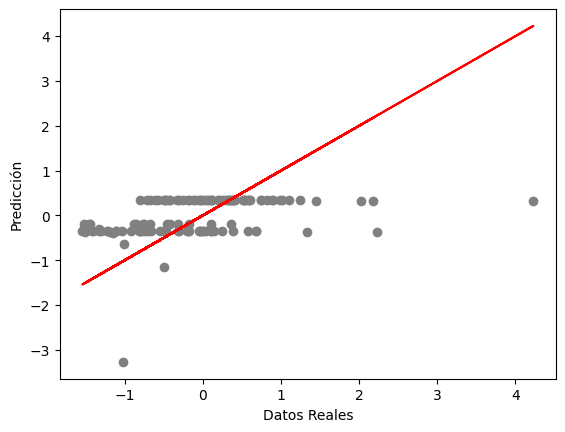

In [222]:
import matplotlib.pyplot as plt
plt.scatter(prueba['salary_in_usd'], y_aprox, color='gray')
plt.plot(prueba['salary_in_usd'],prueba['salary_in_usd'], color='red')
plt.xlabel("Datos Reales")
plt.ylabel("Predicción")

Text(0, 0.5, 'Frecuencia (Probabilidad)')

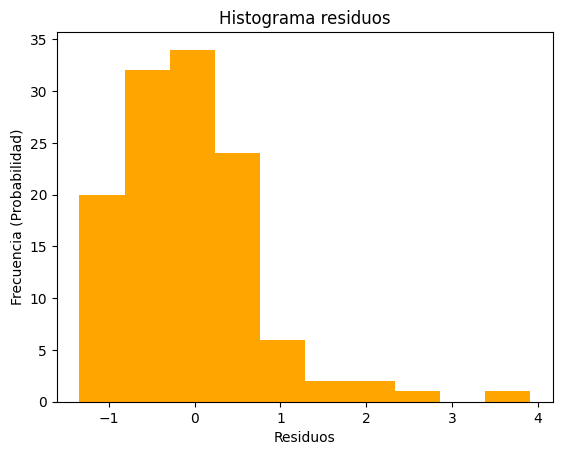

In [223]:
plt.hist(x=tabla['Errores'], color='orange')
plt.title('Histograma residuos')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia (Probabilidad)")

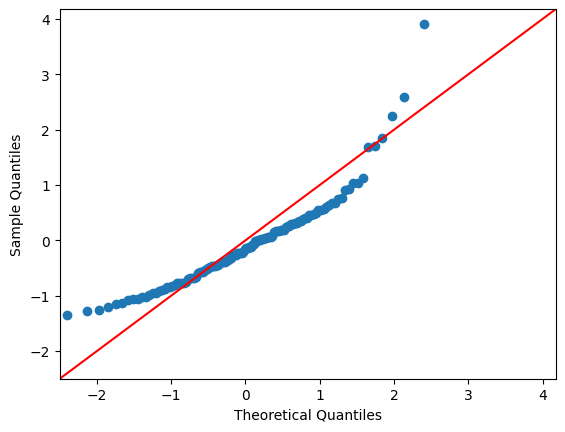

In [224]:
import statsmodels.api as sm
from scipy import stats
QQ = sm.qqplot(tabla['Errores'], stats.norm, line='45')

In [225]:
media = tabla['Errores'].mean()
std = tabla['Errores'].std()
Errores_est=(tabla['Errores']-media)/std
stats.kstest(Errores_est, 'norm')

KstestResult(statistic=0.07918223576730476, pvalue=0.4076308371884318, statistic_location=0.5229810761201699, statistic_sign=1)

# Conclusion

---

Los datos reales con nueestra prediccion no se acercan a la relacion lineal que eestamos buscando. Eso quiere decir que el modelo no se adecua correctamente a nuestros datos y por ende es necesario buscar otro tipo de modelo que logre acertar con mayor exactitud la preediccion de los datos con los reales.